In [ ]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

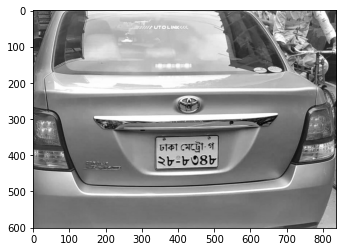

In [ ]:
img = cv2.imread('test3 (2).jpg')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
#plt.imshow(gray)

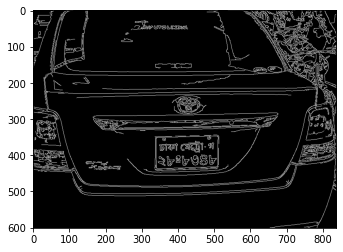

In [ ]:
bfilter= cv2.bilateralFilter(gray, 11, 17, 17) #noise reduction
edged= cv2.Canny(bfilter, 30, 200) #edge reduction
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:50]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 50, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
print(location)

[[[510 349]]

 [[341 351]]

 [[340 435]]

 [[507 431]]]


In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image= cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

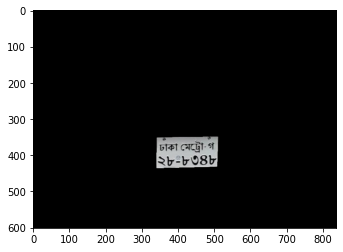

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)= np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

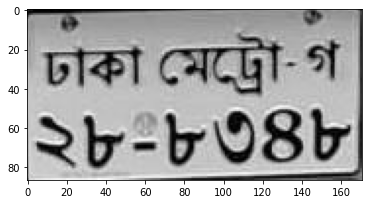

In [ ]:
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['bn'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
#result = reader.readtext(cropped_img)
result = reader.readtext(cropped_img, detail=1, paragraph=True)
print(result)

[[[[0, 9], [171, 9], [171, 87], [0, 87]], 'ঢাকা মেট্রো-গ ২৮-৮৩৪৮']]


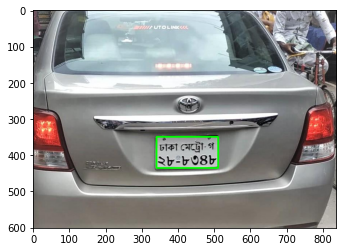

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
# res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))